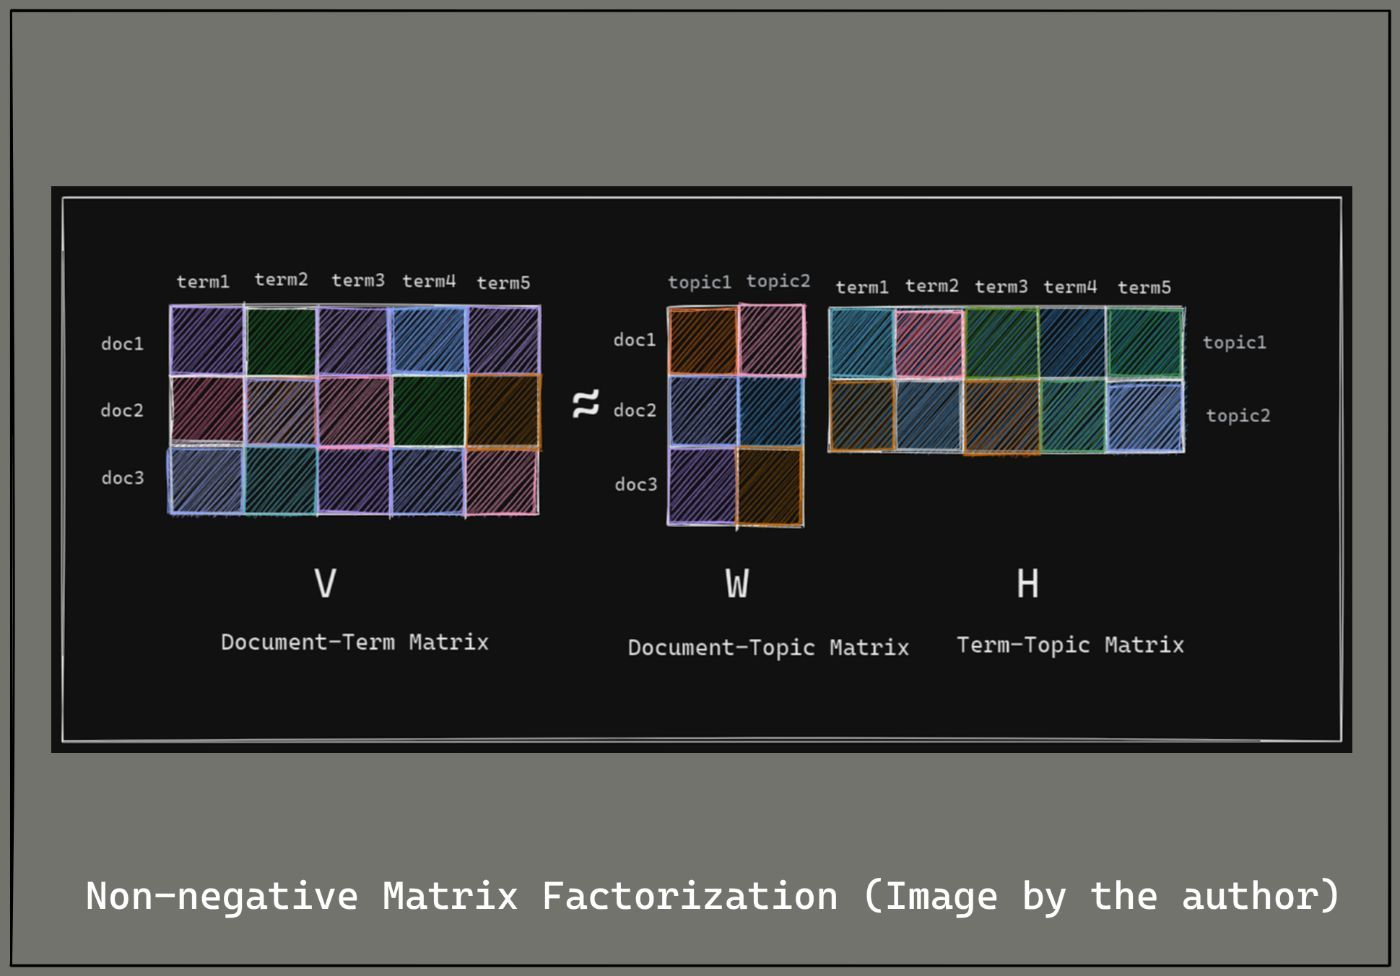

# **Non-negative Matrix Factorization (NMF) for Topic Modeling**

Non-negative Matrix Factorization (NMF) is a useful technique for topic modeling, where we decompose a non-negative matrix \( V \) into two non-negative matrices \( W \) and \( H \), such that:

\[
V \approx W \times H
\]

## **Definition of Components**
In the context of topic modeling:
- \( V \): The input matrix of shape \( m \times n \), where:
  - \( m \) represents documents
  - \( n \) represents words
  - \( V \) can be a word frequency matrix or term-document matrix.
- \( W \): The basis matrix of shape \( m \times k \), where each row represents the distribution of topics for each document.
- \( H \): The coefficient matrix of shape \( k \times n \), where each row represents the distribution of words within each topic.
- \( k \): The number of topics (or latent factors), chosen by the user, typically less than both the number of documents and the number of words.

The goal of NMF is to iteratively update \( W \) and \( H \) to minimize the reconstruction error between \( V \) and \( W \times H \).

## **Steps of the Multiplicative Update Algorithm**

The multiplicative update rules for \( W \) and \( H \) are as follows:

1. **Update \( W \)**:
   \[
   W \leftarrow W \odot \frac{(V H^T)}{(W H H^T)}
   \]

2. **Update \( H \)**:
   \[
   H \leftarrow H \odot \frac{(W^T V)}{(W^T W H)}
   \]
   
where:
- \( \odot \) denotes element-wise multiplication.
- All divisions are element-wise.

## **Stopping Criterion**
The algorithm stops based on either a maximum number of iterations or a tolerance threshold for the change in the **Frobenius norm** of the difference \( V - W H \).

In [1]:
from sklearn.decomposition import NMF
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [3]:
class nmf_topic_modeling:
    def __init__(self, documents : list, num_topics : int) -> None:
        self.documents = documents
        self.num_topics = num_topics
        self.vectorizer = CountVectorizer(stop_words='english')
        self.dtm = self.vectorizer.fit_transform(documents)
        self.words = self.vectorizer.get_feature_names_out()  
        self.nmf_model = NMF(n_components=num_topics, random_state=42)
        W = self.nmf_model.fit_transform(self.dtm)
        self.H = self.nmf_model.components_

    def fit(self, n_words = 5) -> list:
        self.topics = []
        for topic in self.H:
            top_word_in_topic = topic.argsort()[ : -n_words - 1 : -1]
            topic = " ".join([self.words[index] for index in top_word_in_topic])
            self.topics.append(topic)

In [4]:
documents = [
    "I love programming in Python",
    "Machine learning is amazing",
    "Python is great for data science",
    "Deep learning is a part of machine learning",
    "I enjoy learning about AI and deep learning",
    "Data science involves programming and machine learning"
]
topic_model = nmf_topic_modeling(documents, num_topics=2)
topic_model.fit()


In [5]:
topic_model.topics

['learning deep machine enjoy ai', 'science data programming python involves']